# Part 2: DNN on MNIST and CIFAR10
### In our lab, you guys saw how to work with the MNIST dataset to perform image classification. We can attempt the MNIST classification problem with just fully connected layers. This means we will be optimizing for non-banded matrices (no convolutions).

### 1.Calcualte the number of weight parameters you are optimizing for 1, 2 and 3 differen fully connected layers (the total size of each layer is up to you).
Answer: There will be 79,510 paramaters for one layer (softmax), 88600 parameters for two layers (ReLu and softmax), 98700 for three layers.

### 2.What is the max layer depth you can go before training loss does not converge? You can usually tell that something is not converging by examining the training loss vs. iteration curve.
Answser: when set the epoch to be 5, the max layer depth is before training loss does not converge is 5. Figure attached below.

### 3.How does the number of parameters relate to the training loss and validation/test loss?Try to get a few data points to speak to this question.
When using ReLu, the more number of parameters are, the lower validation error is.
### 4.Keeping the maximum number of parameters possible while still maintaining convergence (i.e., a good training and validation/test loss), what happens when you swap the activation function to tanh instead of relu? How about sigmoid?
When swap the activation function to tanh, the accuracy roughly keeps the same with increased parameters. When swap it to sigmoid, the more parameters leads to lower accuracy, which means the model overfitted. 
### 5.After exploring the above, train a DNN model with the combination of hyperparameters that you believe will work best on MNIST.
See the figure results below.
### 6.Using the same architecture, try training a DNN model on more difficult dataset such as Fashion MNIST or CIFAR10/100. Example download instructions are shown in the next problem.
### Must haves 
### 1.Make a curve of the final validation/test loss of your DNN after the loss plateaus as a function of the number of weight parameters used (final loss versus # parameters used). Note that you might see something like the curve below for a low number of parameters, but as the number of parameters increases, it will not look like this plot.
### 2. On the same figure, make the same curve as above, but use different activation functions in your architecture.
### 3. Plot a point corresponding to your crafted DNN archiecture for question 4.
### 4. Repeat 1-3 for CIFAR10

## MNIST

11493376/11490434 [==============================] - 0s 0us/step
Training data shape (60000, 28, 28, 1)


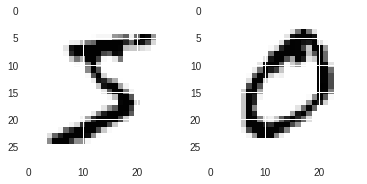

In [2]:
# Download and visualize the data: see all here https://www.tensorflow.org/api_docs/python/tf/keras/datasets
import numpy as np
import tensorflow as tf
(X_train, y_train), (X_val, y_val) = tf.keras.datasets.mnist.load_data()#cifar10
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_val = tf.keras.utils.to_categorical(y_val, 10)

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1) #32 by 32
X_val = X_val.reshape(X_val.shape[0], 28, 28, 1)

from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Flatten
%matplotlib inline

print('Training data shape', X_train.shape)
_, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(X_train[0].reshape(28, 28), cmap=plt.cm.Greys);
ax2.imshow(X_train[1].reshape(28, 28), cmap=plt.cm.Greys);

def Model_para(num_layer=1,input_dim=(28, 28, 1),activation='relu',epoch=10, early_stop_flag=False,verb=0):
    # define layers for the model
    para_count=0 
    Loss_Value=0
    model = Sequential()
    model.add(Flatten(input_shape=input_dim))
    for i in range(num_layer):
        model.add(Dense(100,activation=activation))
    model.add(Dense(10,activation='softmax'))

    model.compile(optimizer=tf.train.AdamOptimizer(0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
    
# complie is when you set all pipes in place and can not change it after compile
    model.summary()
    para_count=model.count_params()
    early_stop=tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=2,verbose=0, mode='auto') 
    if early_stop_flag:   
        hist=model.fit(X_train, y_train,batch_size=64,epochs=epoch,verbose=verb,validation_data=(X_val, y_val),callbacks=[early_stop])
    else:
        hist=model.fit(X_train, y_train,batch_size=64,epochs=epoch,verbose=verb,validation_data=(X_val, y_val))
    Loss_total=100-100*np.array(hist.history['val_acc'])
    #Loss_Value=hist.history['val_loss'][-1]
    Loss_Value=max(Loss_total)
    return para_count,Loss_total,Loss_Value, num_layer,model

1
Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________
Instructions for updating:
Use tf.cast instead.
3
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense

Text(0, 0.5, 'Validation Error(%)')

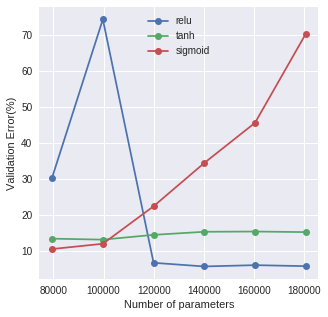

In [3]:
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
num=[1,3,5,7,9,11]
activation=['relu','tanh','sigmoid']
plt.figure(figsize=(5,5))
# use relu as the activation
for act in activation:
    #index_act=activation.index(act)
    para_num=[]
    Loss=[]
    layer_num=[]
    #cvscores =[]
    for num_layer in num:
        print(num_layer)
        index_layer=num.index(num_layer)
        para_count,Loss_total, Loss_Value, num_layer,model=Model_para(num_layer,
                                                       input_dim=(28, 28, 1),activation=act,
                                                       epoch=5, early_stop_flag=False,verb=0)
        #scores = Model.evaluate(model,X_val, y_val, verbose=0)
        
        para_num=np.append(para_num,para_count)
        Loss=np.append(Loss,Loss_Value)
        layer_num=np.append(layer_num,num_layer)
        #cvscores=np.append(cvscores,100-scores[1] * 100)
        del para_count, Loss_Value, num_layer,model,Loss_total
    plt.plot(para_num,Loss,'o-',label=act)
    plt.legend(loc='best')
    print(para_num)
   # print(cvscores)
    del para_num,Loss,layer_num

plt.xlabel('Number of parameters')
plt.ylabel('Validation Error(%)')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_19 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_134 (Dense)            (None, 100)               78500     
_________________________________________________________________
dense_135 (Dense)            (None, 100)               10100     
_________________________________________________________________
dense_136 (Dense)            (None, 100)               10100     
_________________________________________________________________
dense_137 (Dense)            (None, 100)               10100     
_________________________________________________________________
dense_138 (Dense)            (None, 100)               10100     
_________________________________________________________________
dense_139 (Dense)            (None, 100)               10100     
__________

Text(0, 0.5, 'Validation error (%)')

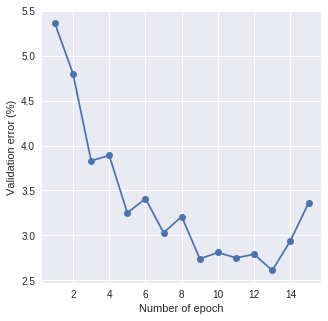

In [5]:
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
para_count, Loss_total, Loss_Value, num_layer,model=Model_para(num_layer=7,
                                                       input_dim=(28, 28, 1),activation='relu',
                                                       epoch=15, early_stop_flag=False,verb=1)

print(Loss_total)
plt.figure(figsize=(5,5))
epochnum=np.arange(1, 16)
plt.plot(epochnum,Loss_total,'o-')
#print(epochnum)
plt.xlabel('Number of epoch')
plt.ylabel('Validation error (%)')

## CIRAR 10

170500096/170498071 [==============================] - 65s 0us/step
Training data shape (50000, 32, 32, 3)


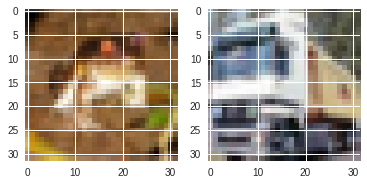

In [1]:
# Download and visualize the data: see all here https://www.tensorflow.org/api_docs/python/tf/keras/datasets
import numpy as np
import tensorflow as tf
(X_train, y_train), (X_val, y_val) = tf.keras.datasets.cifar10.load_data()#cifar10
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_val = tf.keras.utils.to_categorical(y_val, 10)

X_train = X_train.reshape(X_train.shape[0], 32, 32, 3) #32 by 32
X_val = X_val.reshape(X_val.shape[0], 32, 32, 3)

from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Flatten
%matplotlib inline

print('Training data shape', X_train.shape)
_, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(X_train[0].reshape(32, 32,3), cmap=plt.cm.Greys);
ax2.imshow(X_train[1].reshape(32, 32,3), cmap=plt.cm.Greys);

def Model_para(num_layer=1,input_dim=(32, 32, 3),activation='relu',epoch=10, early_stop_flag=False,verb=0):
    # define layers for the model
    para_count=0 
    Loss_Value=0
    model = Sequential()
    model.add(Flatten(input_shape=input_dim))
    for i in range(num_layer):
        model.add(Dense(100,activation=activation))
    model.add(Dense(10,activation='softmax'))

    model.compile(optimizer=tf.train.AdamOptimizer(0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
    
# complie is when you set all pipes in place and can not change it after compile
    model.summary()
    para_count=model.count_params()
    early_stop=tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=2,verbose=0, mode='auto') 
    if early_stop_flag:   
        hist=model.fit(X_train, y_train,batch_size=64,epochs=epoch,verbose=verb,validation_data=(X_val, y_val),callbacks=[early_stop])
    else:
        hist=model.fit(X_train, y_train,batch_size=64,epochs=epoch,verbose=verb,validation_data=(X_val, y_val))
    Loss_total=100-100*np.array(hist.history['val_acc'])
    Loss_Value=max(Loss_total)
    return para_count, Loss_total, Loss_Value, num_layer,model

1
Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               307300    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
Total params: 308,310
Trainable params: 308,310
Non-trainable params: 0
_________________________________________________________________
Instructions for updating:
Use tf.cast instead.
3
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_2 (Den

Text(0, 0.5, 'Validation Error(%)')

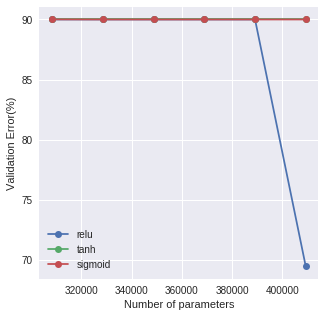

In [2]:
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
num=[1,3,5,7,9,11]
activation=['relu','tanh','sigmoid']
plt.figure(figsize=(5,5))
# use relu as the activation
for act in activation:
    #index_act=activation.index(act)
    para_num=[]
    Loss=[]
    layer_num=[]
   # cvscores =[]
    for num_layer in num:
        print(num_layer)
        index_layer=num.index(num_layer)
        para_count,Loss_total, Loss_Value, num_layer,model=Model_para(num_layer,
                                                       input_dim=(32, 32, 3),activation=act,
                                                       epoch=5, early_stop_flag=False,verb=0)
       # scores = Model.evaluate(model,X_val, y_val, verbose=0)
        
        para_num=np.append(para_num,para_count)
        Loss=np.append(Loss,Loss_Value)
        layer_num=np.append(layer_num,num_layer)
      #  cvscores=np.append(cvscores,100-scores[1] * 100)
        del para_count, Loss_Value, num_layer,model,Loss_total
    plt.plot(para_num,Loss,'o-',label=act)
    plt.legend(loc='best')
    print(para_num)
   # print(cvscores)
    del para_num,Loss,layer_num

plt.xlabel('Number of parameters')
plt.ylabel('Validation Error(%)')


In [3]:
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
para_count, Loss_total, Loss_Value, num_layer,model=Model_para(num_layer=13,
                                                       input_dim=(32, 32, 3),activation='relu',
                                                       epoch=15, early_stop_flag=False,verb=1)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 100)               307300    
_________________________________________________________________
dense_11 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_12 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_13 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_14 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_15 (Dense)             (None, 100)               10100     
__________

[68.92     67.59     63.870003 62.44     60.989998 59.57     59.34
 59.28     58.199997 60.23     57.98     57.97     55.27     56.91
 56.44    ]


Text(0, 0.5, 'Validation error (%)')

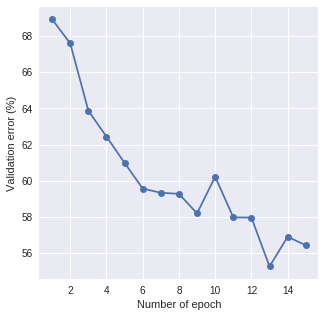

In [4]:
print(Loss_total)
plt.figure(figsize=(5,5))
epochnum=np.arange(1, 16)
plt.plot(epochnum,Loss_total,'o-')
#print(epochnum)
plt.xlabel('Number of epoch')
plt.ylabel('Validation error (%)')